In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pg import DB
import configparser
import warnings
warnings.simplefilter('error',RuntimeWarning)
from scoot_utilities import *
from IPython.display import HTML, display
import tabulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
CONFIG = configparser.ConfigParser()
CONFIG.read('db.cfg')
dbset = CONFIG['DBSETTINGS']
db = DB(dbname=dbset['database'],host=dbset['host'],user=dbset['user'],passwd=dbset['password'])

In [10]:
centrelines = [3304786,446523,30018925,30018925,1147201,1147201,1147026,1147466,8540609,8571185,11466484,1141946]
dir_bins = [1,-1,1,-1,1,-1,1,1,1,-1,1,-1]
sdetectors = [['\'N12921J1\'','\'N12921J2\''],['\'N12931A1\'','\'N12931A2\''],['\'N12821C1\'','\'N12821C2\'','\'N12821C3\''],['\'N12851G1\'','\'N12851G2\''],['\'N30431K1\'','\'N30431K2\''],['\'N30421B1\'','\'N30421B2\''],['\'N30611K1\'','\'N30611K2\''],['\'N30311D1\'','\'N30311D2\''],['\'N21521K1\''],['\'N21521H1\''],['\'N21421D1\''],['\'N21311B1\'']]
locations = ['Don Mills NB N of Overlea','Don Mills SB S of Gateway','Don Mills NB N of Clock Tower','Don Mills SB S of Lawrence','Lake Shore EB E of Stadium','Lake Shore WB W of Bathurst','Lake Shore EB E of Spadina','Lake Shore EB E of Ontario Place','Bloor EB W of Castle Frank','Bloor WB E of Castle Frank','Bloor EB E of Church','Bloor WB W of Church']
aggregation = [[['lane1','lane2'],['lane3']],
               [['lane1','lane2'],['lane3']],
               [['lane1'],['lane2'],['lane3']],
               [['lane2','lane3'],['lane1']],
               [['lane1','lane2'],['lane3']],
               [['lane3'],['lane1','lane2']],
               [['lane1'],['lane2','lane3']],
               [['lane1'],['lane2','lane3']],
               [['lane1','lane2']],
               [['lane1','lane2']],
               [['lane1','lane2']],
               [['lane1','lane2']]]
det_lane = {'N12921J1':2,'N12921J2':1,'N12931A1':2,'N12931A2':1,'N12821C1':1,'N12821C2':1,'N12821C3':1,
                 'N12851G1':2,'N12851G2':1,'N30431K1':2,'N30431K2':1,'N30421B1':1,'N30421B2':2,'N30611K1':1,
                 'N30611K2':2,'N30311D1':1,'N30311D2':2,'N21521K1':2,'N21521H1':2,'N21421D1':2,'N21311B1':2}

In [11]:
scoot_disagg = pd.DataFrame(db.query('SELECT * FROM scoot.cycle_level_170419 WHERE detector IN (' + ','.join([y for x in sdetectors for y in x ]) + ')').getresult(), \
                            columns = ['count_date','count_time','detector','CycleTime','Volume','occupancy','seconds'])
video = pd.DataFrame(db.query('SELECT * FROM scoot.video_counts').getresult(), \
                     columns = ['time_start','time_end','lane1','lane2','lane3','Volume','centreline_id','dir_bin','count_date','seconds'])
video['CycleTime'] = 20
scoot_agg = pd.DataFrame(db.query('SELECT detector, start_time, flow_mean, EXTRACT(HOUR FROM start_time)*3600 + EXTRACT(MINUTE FROM start_time)*60 AS seconds  FROM scoot.agg_15_201704 WHERE start_time::date = \'2017-04-19\' AND detector IN (' + ','.join([y for x in sdetectors for y in x ]) + ')').getresult(), \
                         columns = ['detector', 'count_time', 'Volume', 'seconds'])

In [12]:
start_hour = 0
start_min = 15
start_sec = 0
end_hour = 23
end_min = 59
end_sec = 59

offsets = [0,0,0,0,0,0,0,0,0,0,0,0]

bin_sec = 900

start_time_sec = start_hour * 3600 + start_min * 60 + start_sec
end_time_sec = end_hour * 3600 + end_min * 60 + end_sec
num_bins = (end_time_sec - start_time_sec)//bin_sec
min_bins_start_15 = list(np.linspace(start_time_sec, start_time_sec+bin_sec*num_bins, num_bins+1))
bins = [x//bin_sec for x in min_bins_start_15]
bins = bins[:-1]

Don Mills NB N of Overlea


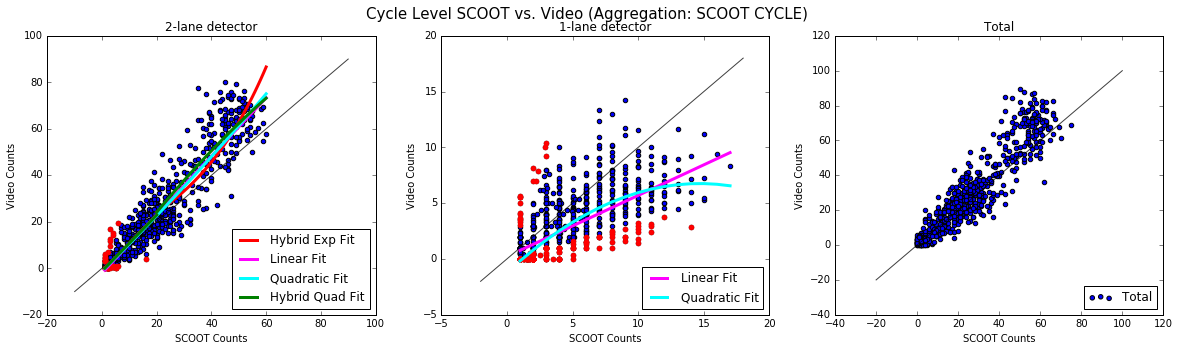

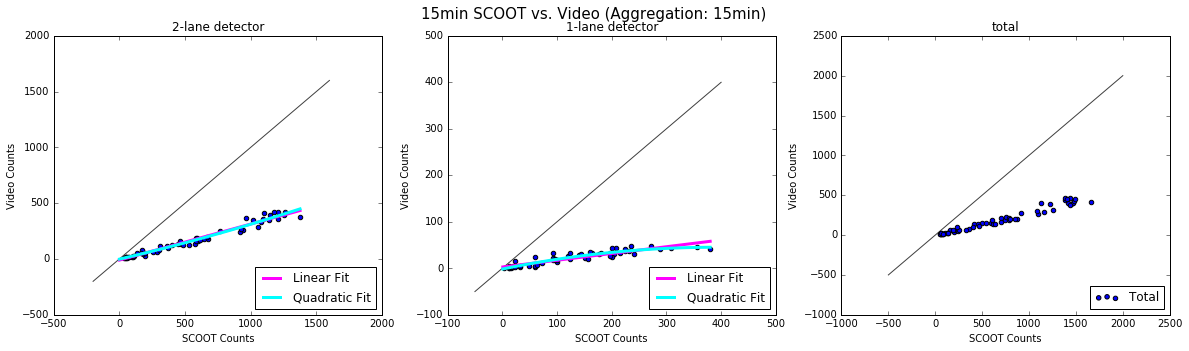

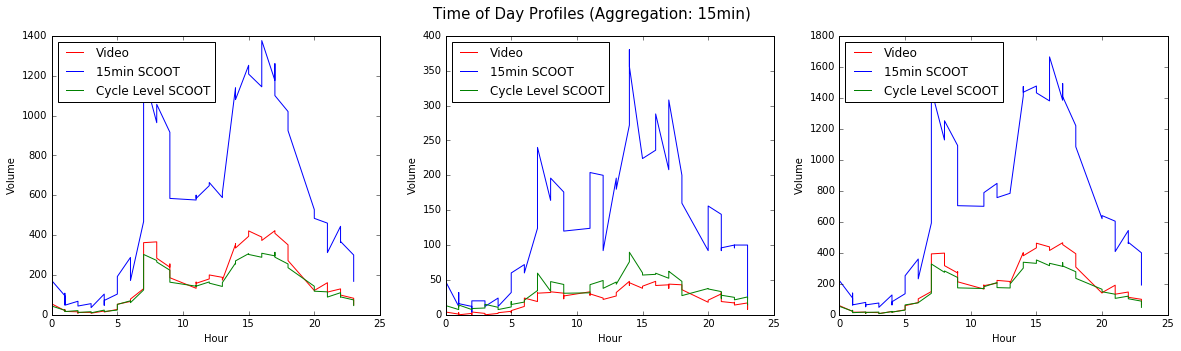

Residual Sum of Squares:
                              Lin hyd Exp    Linear  Quadratic  Lin hyd Quad
Detector        Source                                                      
2-lane detector disaggregate     42551.31  38106.25   37952.54      37758.94
                aggregate             NaN  36865.84   35193.10           NaN
1-lane detector disaggregate          NaN   3271.18    3105.22           NaN
                aggregate             NaN   2203.87    1611.57           NaN



Don Mills SB S of Gateway


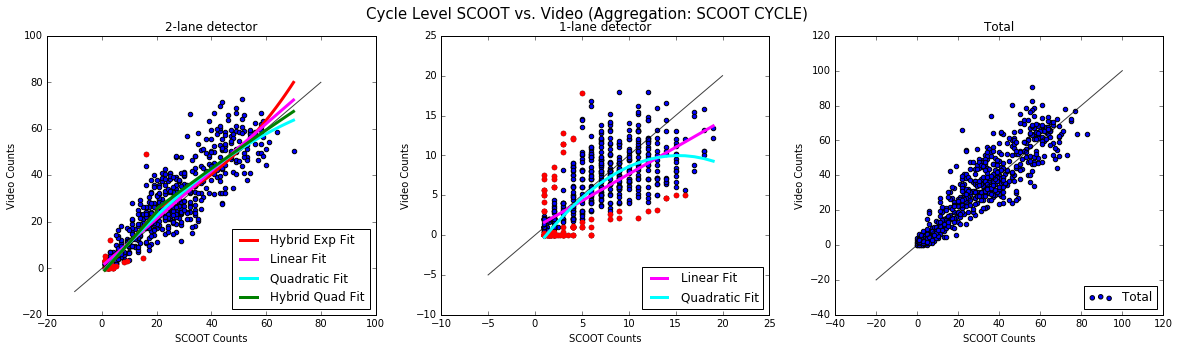

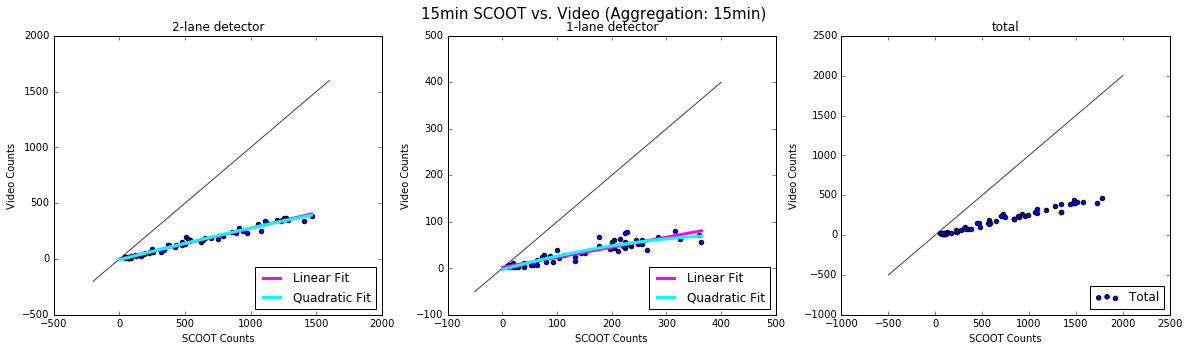

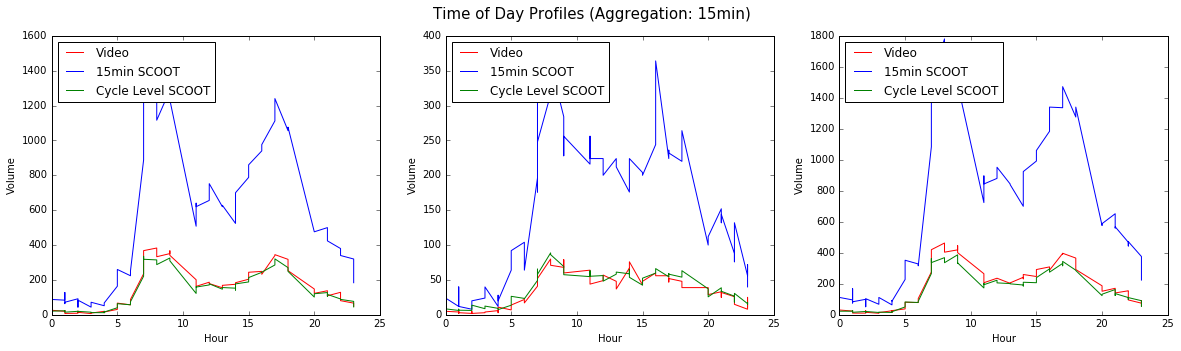

Residual Sum of Squares:
                              Lin hyd Exp    Linear  Quadratic  Lin hyd Quad
Detector        Source                                                      
2-lane detector disaggregate     36401.94  36115.91   34540.42      34816.01
                aggregate             NaN  20426.44   19624.48           NaN
1-lane detector disaggregate          NaN   6042.22    5399.13           NaN
                aggregate             NaN   5611.54    4948.16           NaN



Don Mills NB N of Clock Tower


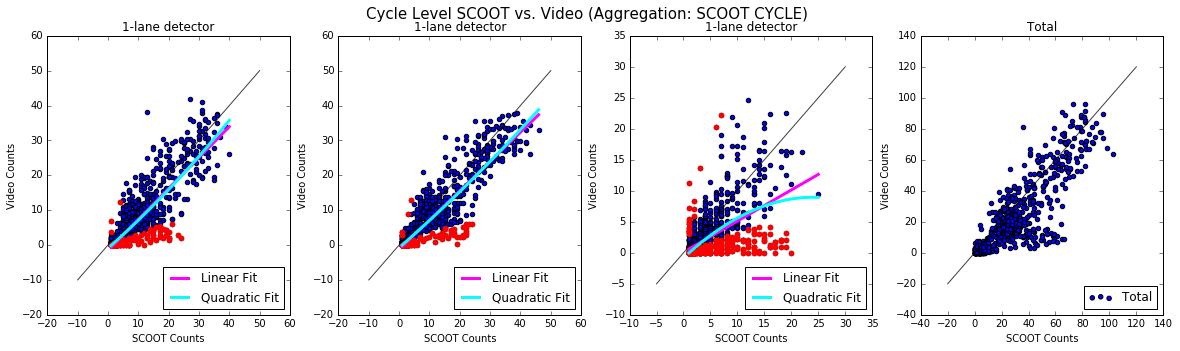

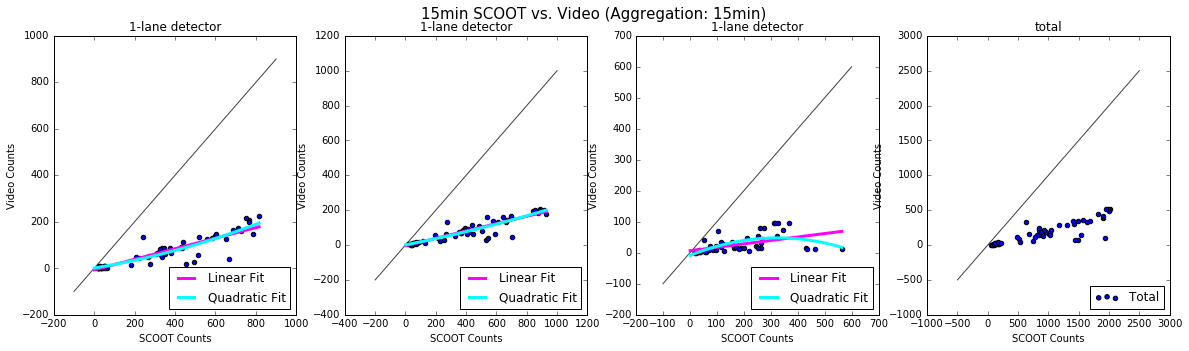

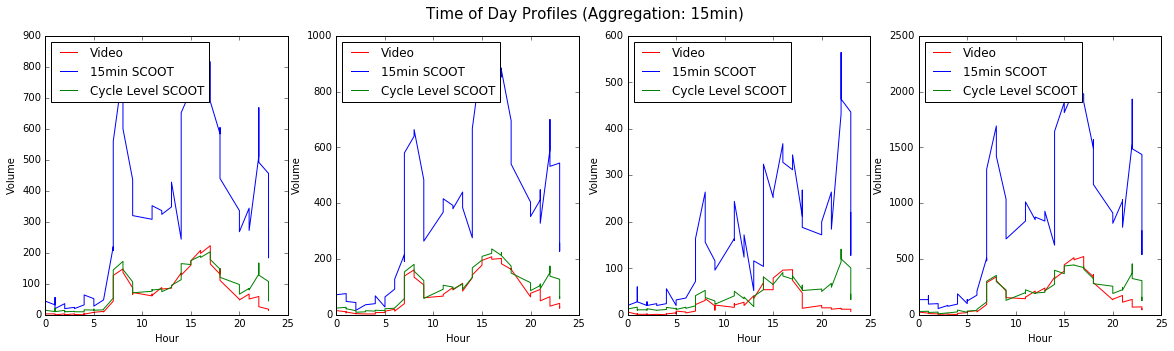

Residual Sum of Squares:
                             Lin hyd Exp    Linear  Quadratic Lin hyd Quad
Detector        Source                                                    
1-lane detector disaggregate        None  18446.58   18351.09         None
                aggregate           None  47878.63   45180.06         None
                disaggregate        None  15064.66   15010.77         None
                aggregate           None  42402.42   41624.83         None
                disaggregate        None   9943.19    9801.53         None
                aggregate           None  33144.42   25950.77         None



Don Mills SB S of Lawrence


C:\Users\qwang2\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


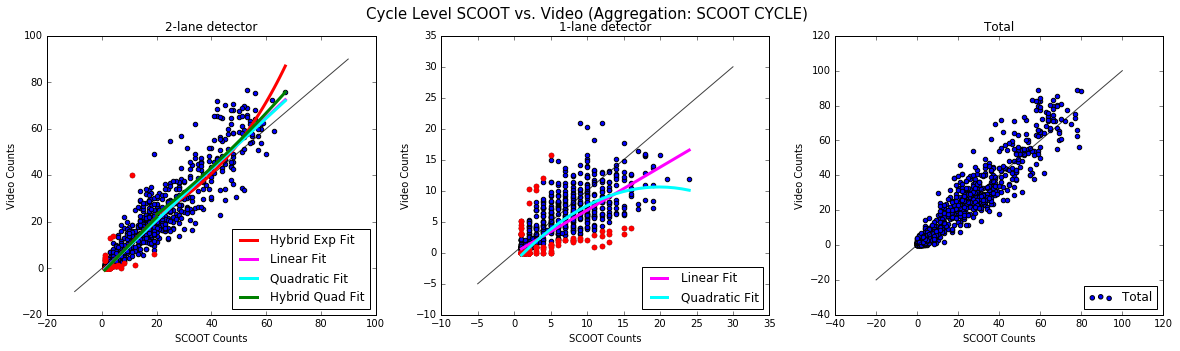

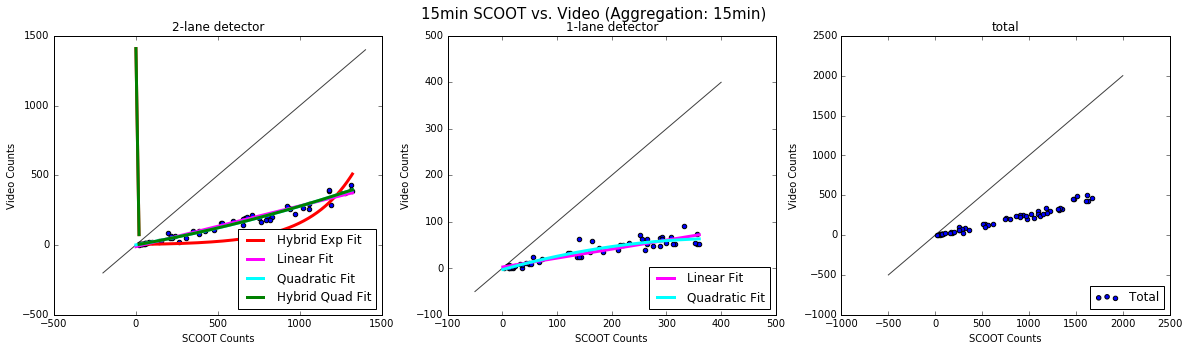

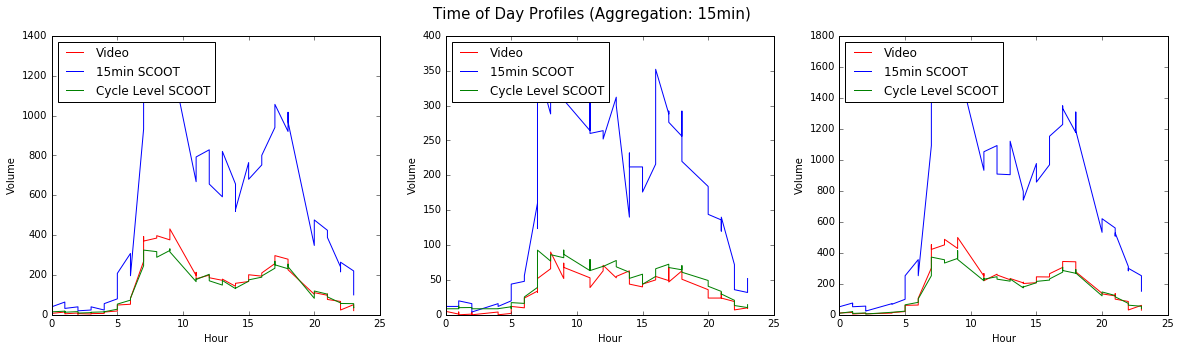

Residual Sum of Squares:
                              Lin hyd Exp    Linear  Quadratic  Lin hyd Quad
Detector        Source                                                      
2-lane detector disaggregate     34801.29  33200.94   33196.60      33476.98
                aggregate       423605.24  34836.93   28663.51      28675.26
1-lane detector disaggregate          NaN   6089.86    5662.01           NaN
                aggregate             NaN   5421.99    4447.95           NaN



Lake Shore EB E of Stadium


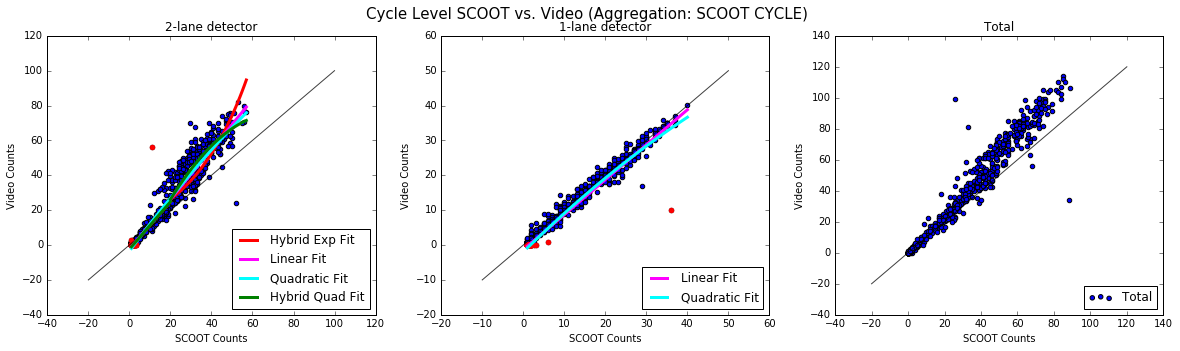

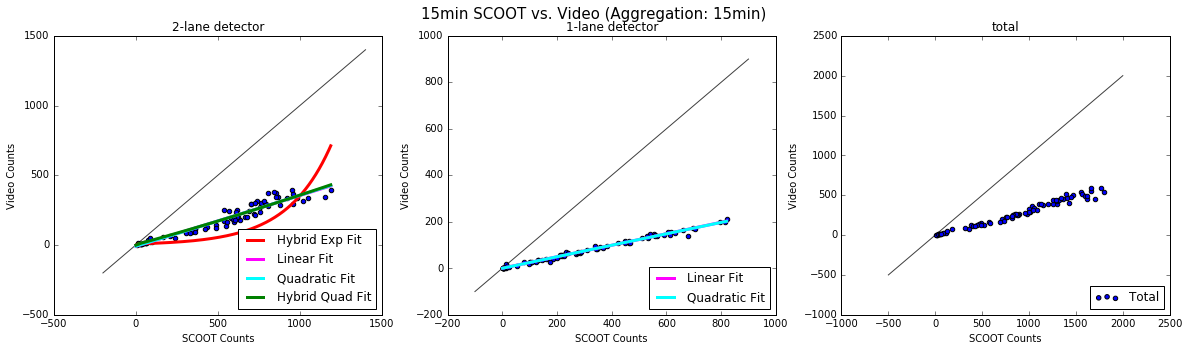

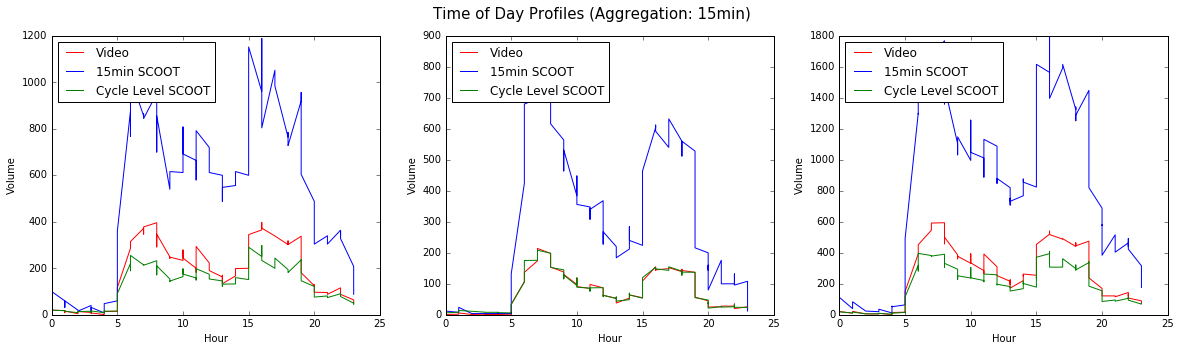

Residual Sum of Squares:
                              Lin hyd Exp    Linear  Quadratic  Lin hyd Quad
Detector        Source                                                      
2-lane detector disaggregate     34001.45  24967.25   24628.24      24143.97
                aggregate       992272.30  82590.13   82525.94      84174.66
1-lane detector disaggregate          NaN   1860.91    1747.41           NaN
                aggregate             NaN   3163.60    3160.52           NaN



Lake Shore WB W of Bathurst


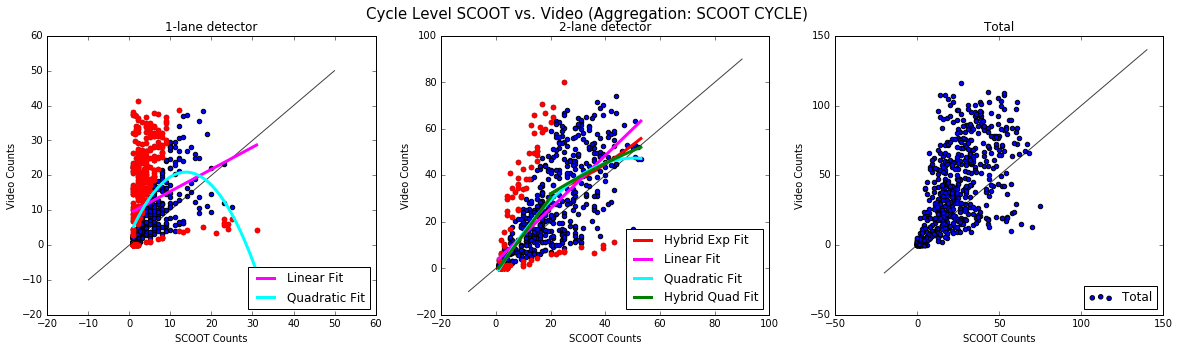

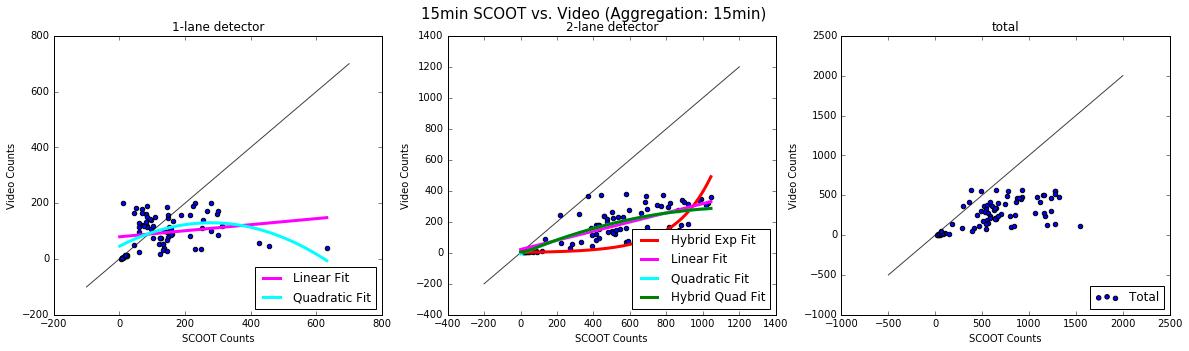

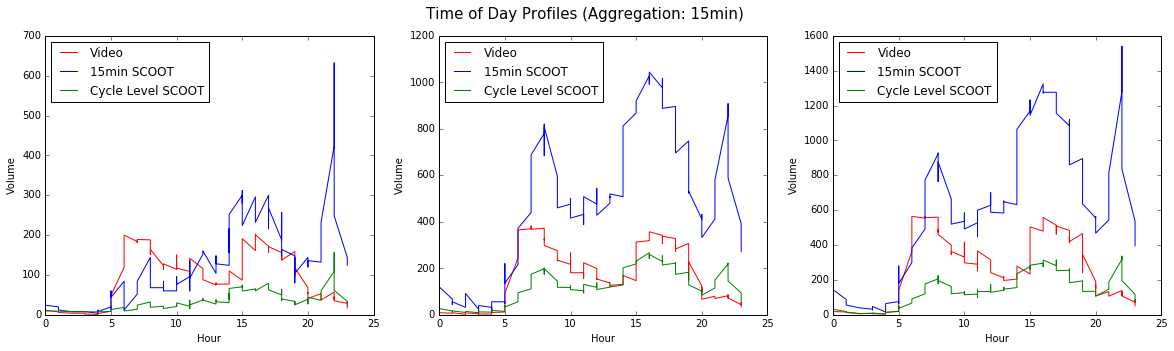

Residual Sum of Squares:
                              Lin hyd Exp     Linear  Quadratic  Lin hyd Quad
Detector        Source                                                       
1-lane detector disaggregate          NaN   71725.47   63695.58           NaN
                aggregate             NaN  277301.43  228760.28           NaN
2-lane detector disaggregate    124499.09  131980.68  123989.69     124283.68
                aggregate      1597435.48  536502.81  508865.43     508825.77



Lake Shore EB E of Spadina


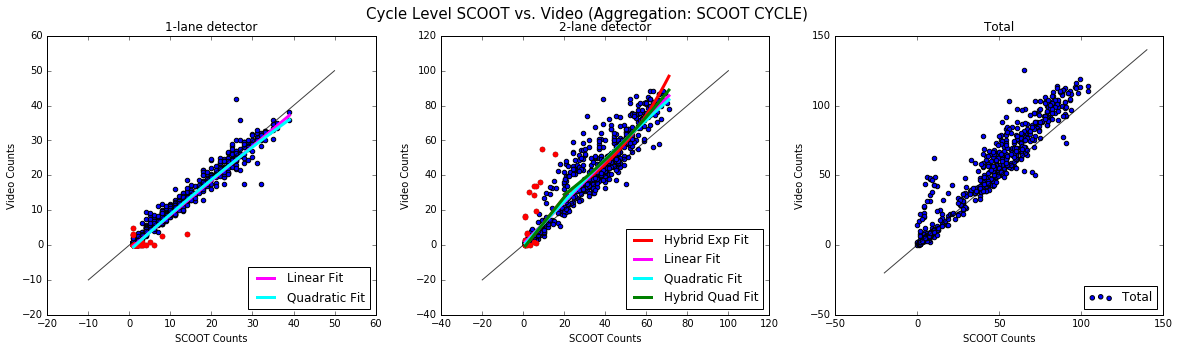

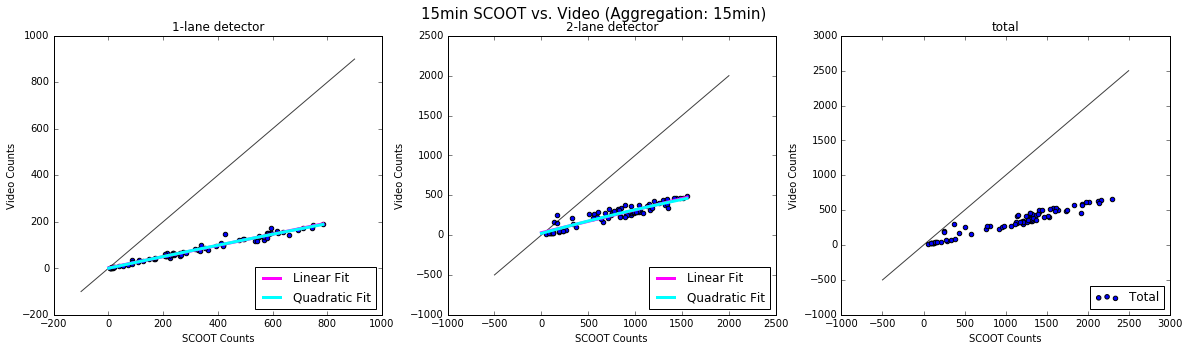

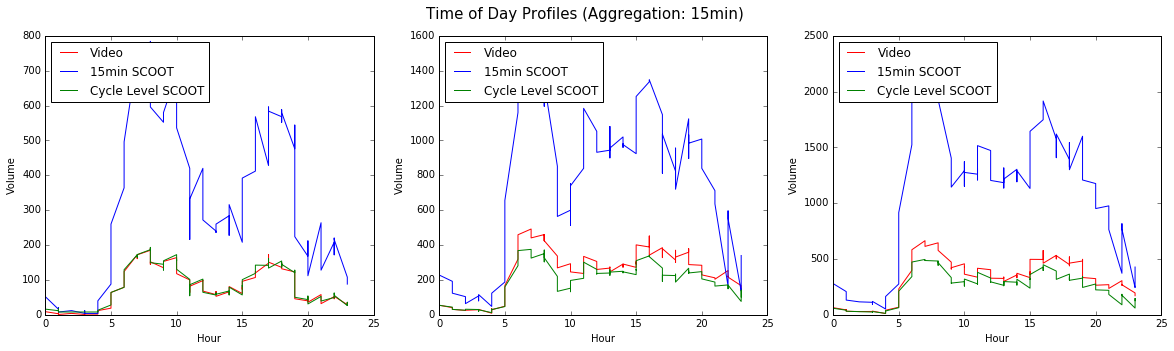

Residual Sum of Squares:
                              Lin hyd Exp     Linear  Quadratic  Lin hyd Quad
Detector        Source                                                       
1-lane detector disaggregate          NaN    2305.63    2263.04           NaN
                aggregate             NaN    5843.80    5782.97           NaN
2-lane detector disaggregate     44724.43   44866.47   44590.09      42867.97
                aggregate             NaN  195234.85  193584.34           NaN



Lake Shore EB E of Ontario Place


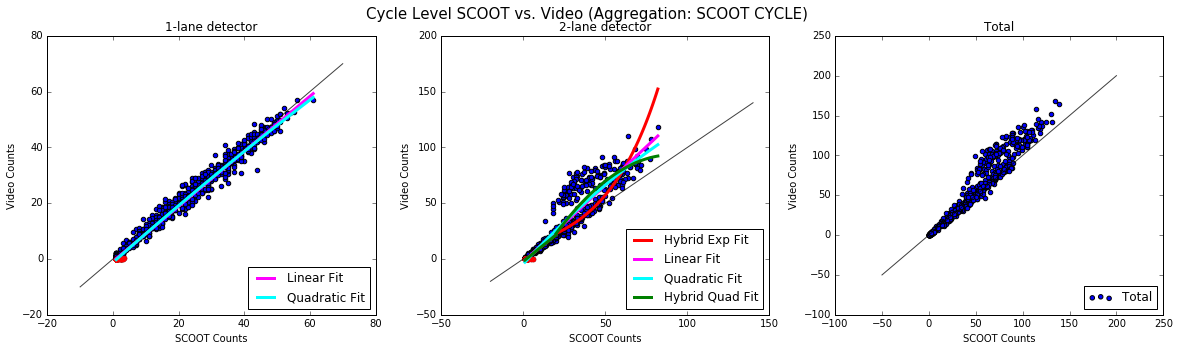

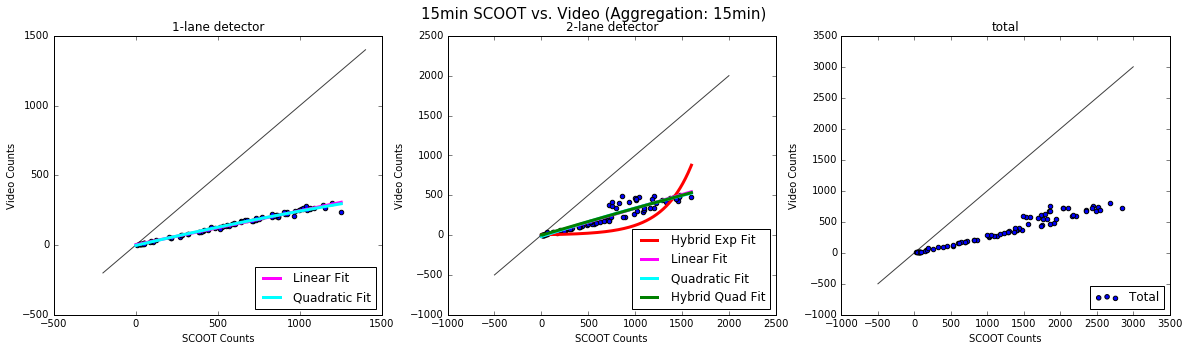

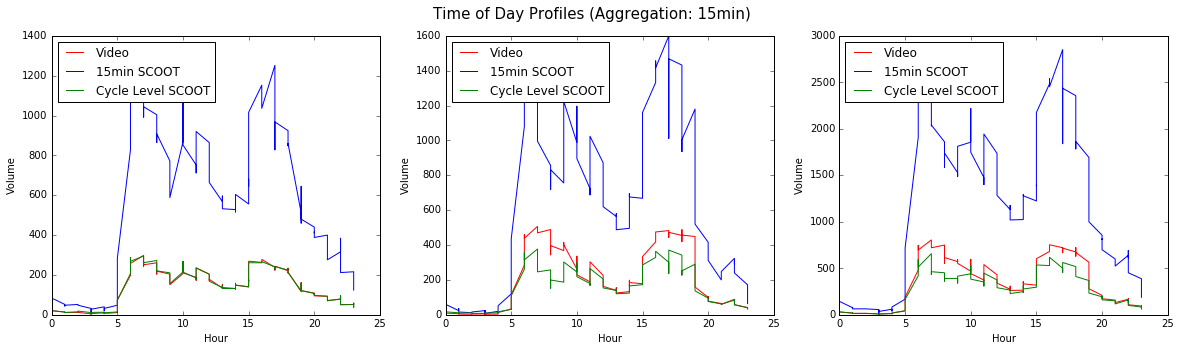

Residual Sum of Squares:
                              Lin hyd Exp     Linear  Quadratic  Lin hyd Quad
Detector        Source                                                       
1-lane detector disaggregate          NaN    2792.40    2748.67           NaN
                aggregate             NaN   10328.89    9302.97           NaN
2-lane detector disaggregate    103768.10   64239.84   63031.69      62313.27
                aggregate      2173553.66  279216.64  276282.79     280528.25



Bloor EB W of Castle Frank


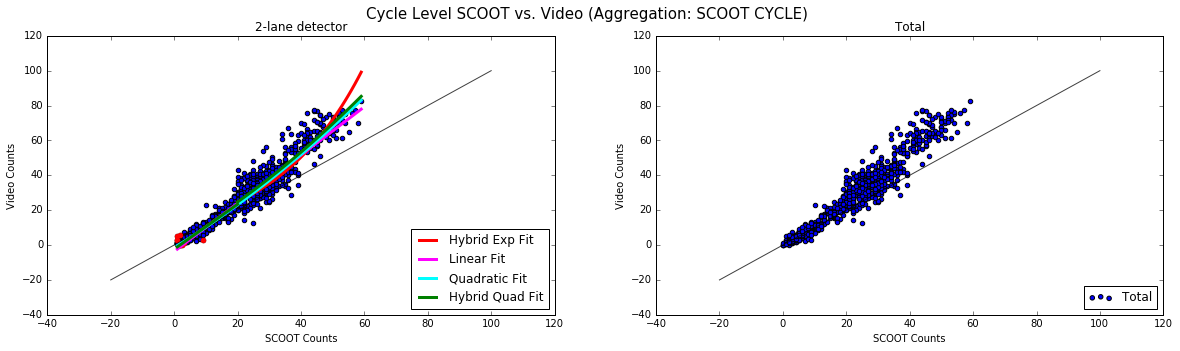

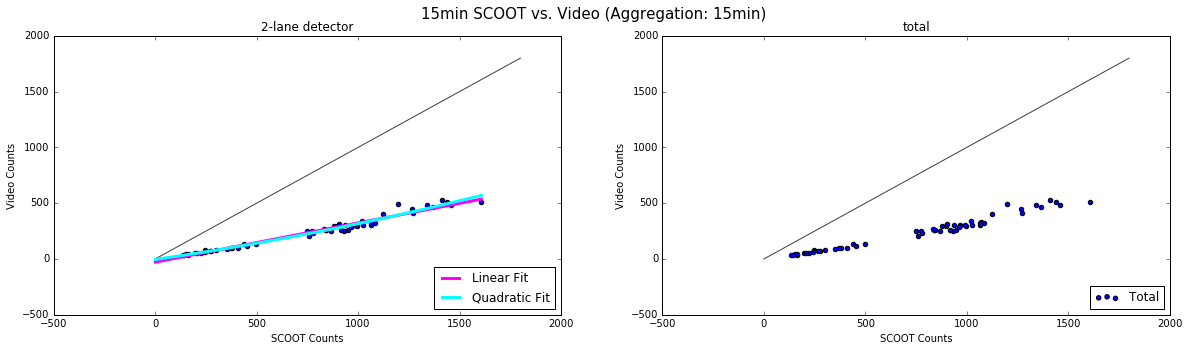

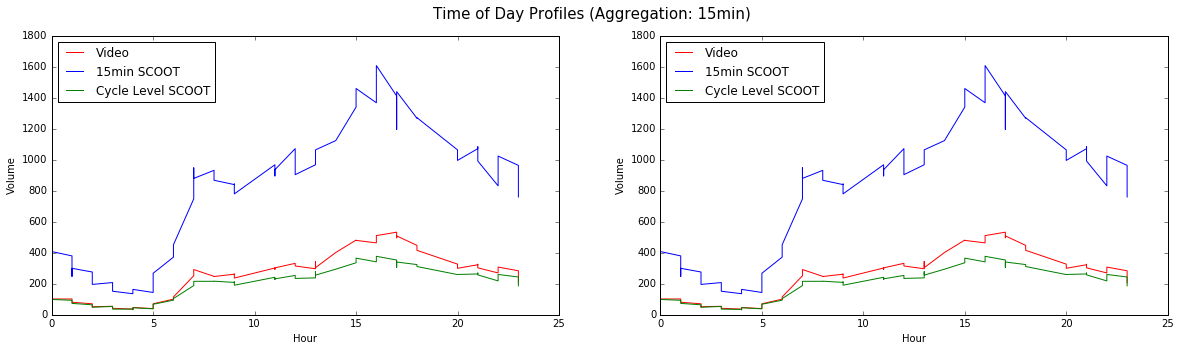

Residual Sum of Squares:
                              Lin hyd Exp    Linear  Quadratic  Lin hyd Quad
Detector        Source                                                      
2-lane detector disaggregate     26772.71  23358.96   22276.92       22362.7
                aggregate             NaN  39121.95   33894.17           NaN



Bloor WB E of Castle Frank


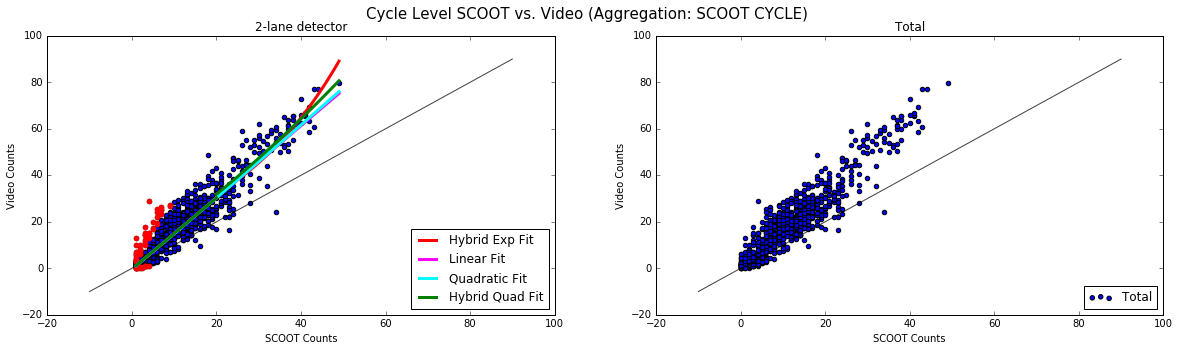

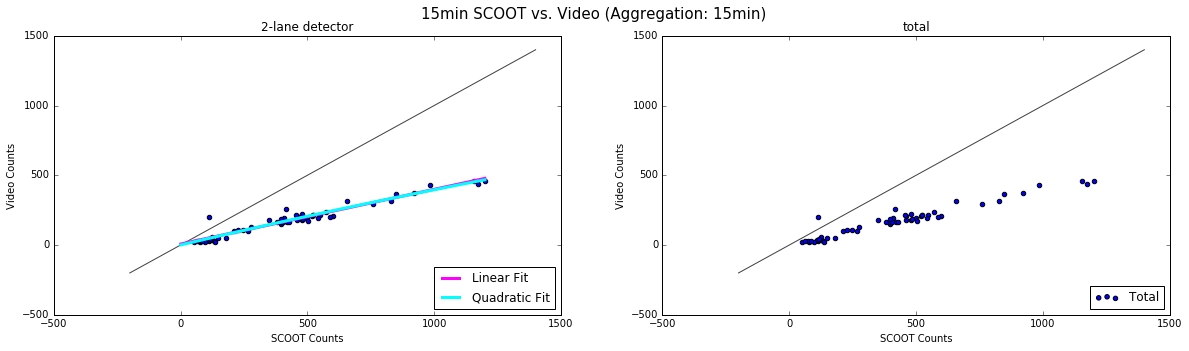

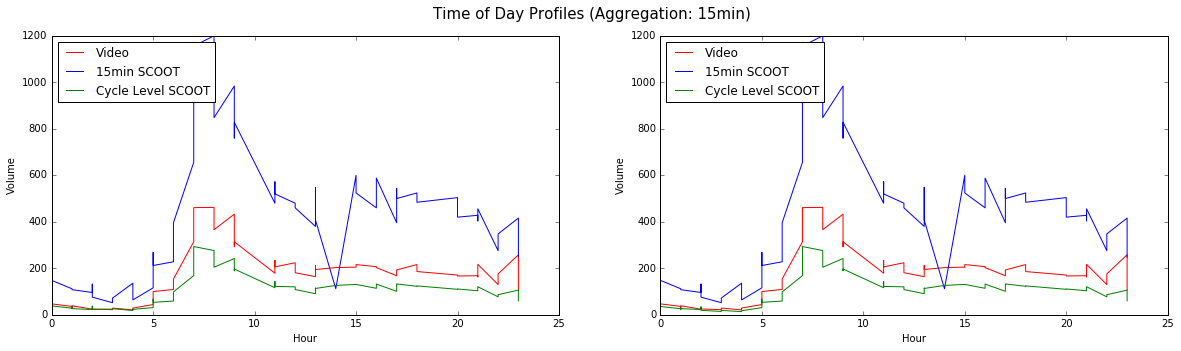

Residual Sum of Squares:
                              Lin hyd Exp    Linear  Quadratic  Lin hyd Quad
Detector        Source                                                      
2-lane detector disaggregate     24390.14  24172.70   24161.62      24081.74
                aggregate             NaN  53220.34   52545.07           NaN



Bloor EB E of Church


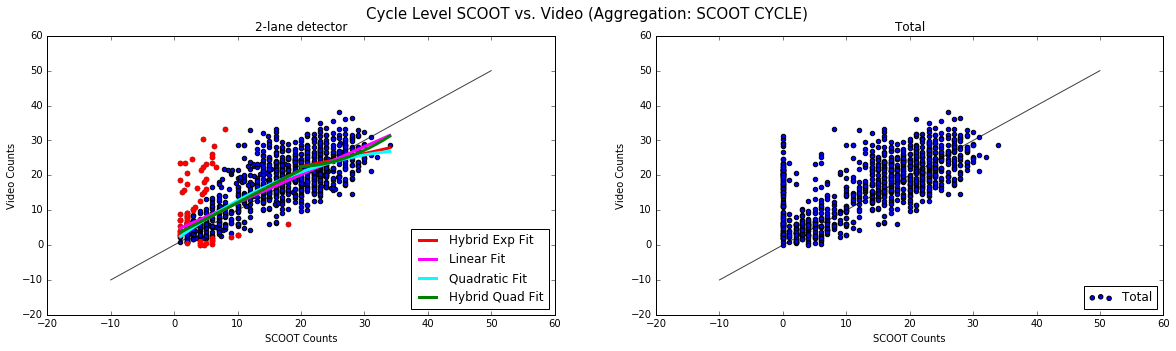

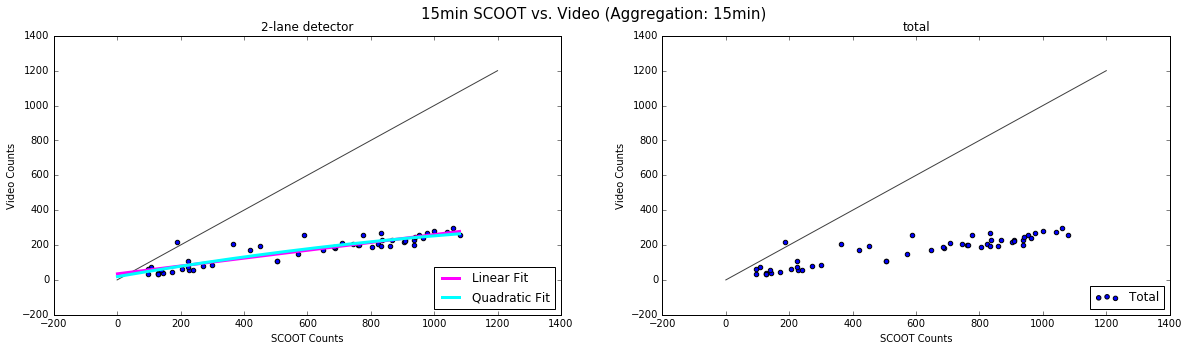

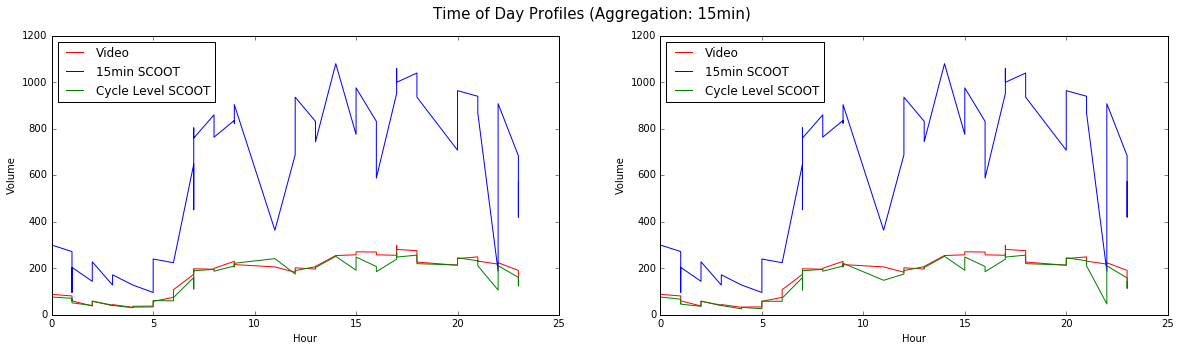

Residual Sum of Squares:
                              Lin hyd Exp    Linear  Quadratic  Lin hyd Quad
Detector        Source                                                      
2-lane detector disaggregate     28865.32  29558.68   28522.75      28791.55
                aggregate             NaN  65272.14   63519.01           NaN



Bloor WB W of Church


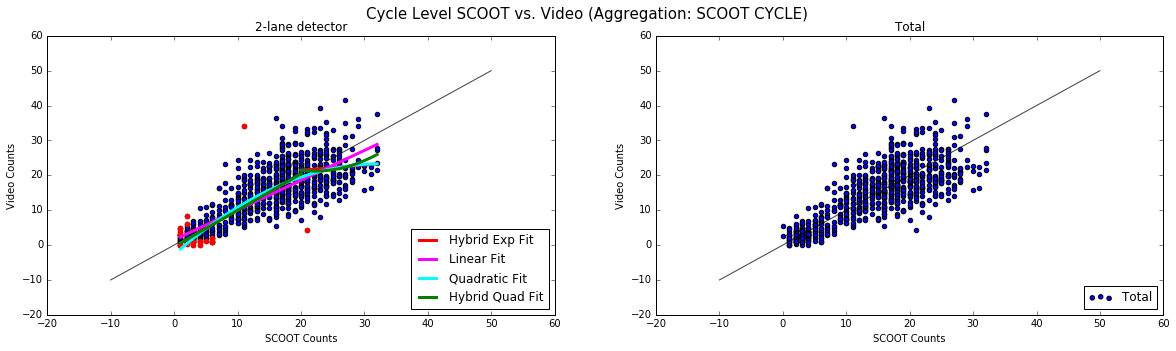

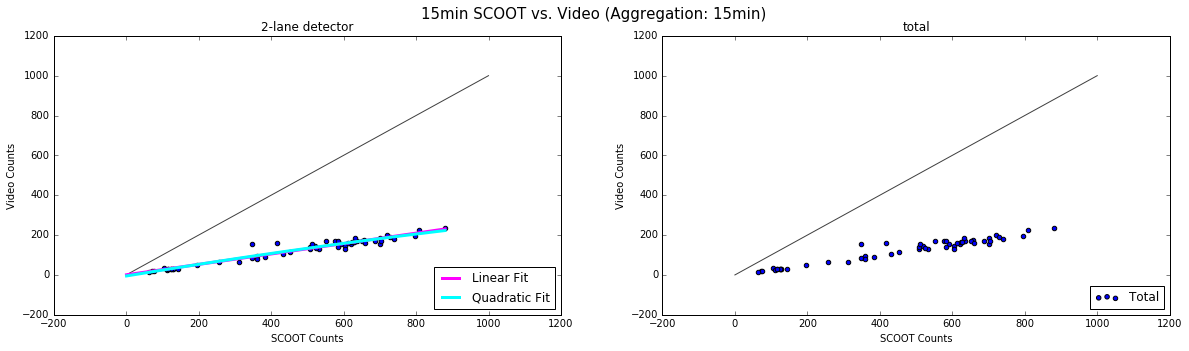

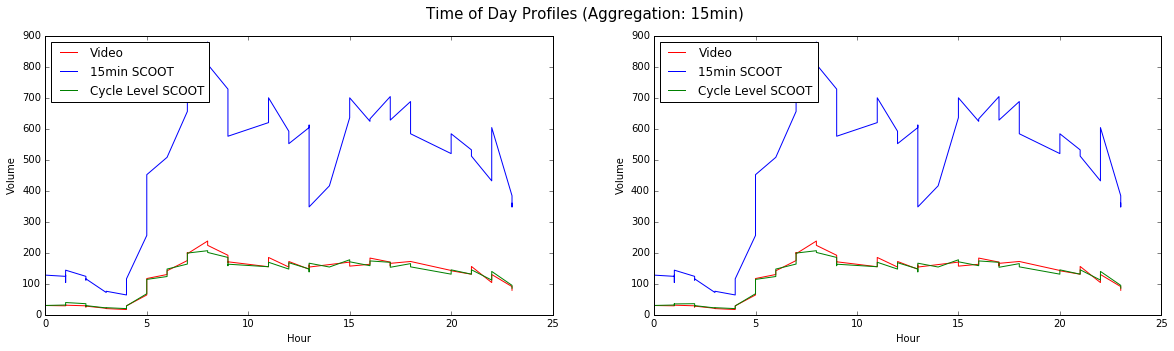

Residual Sum of Squares:
                              Lin hyd Exp    Linear  Quadratic  Lin hyd Quad
Detector        Source                                                      
2-lane detector disaggregate     19276.98  20786.85   18927.50      19172.93
                aggregate             NaN  13232.56   12944.19           NaN





In [13]:
for i in range(len(locations)):
    RSS = []
    sdet = [x.strip('\'') for x in sdetectors[i]]
    tcl = centrelines[i]
    dir_bin = dir_bins[i]
    offset = offsets[i]
    iterables = []
    
    print(locations[i])

    # Time Filter 
    s_d = scoot_disagg[(scoot_disagg['seconds']>=start_time_sec) & (scoot_disagg['seconds']+scoot_disagg['CycleTime']<=end_time_sec)].copy()
    s_d = s_d[s_d['detector'].isin([x.strip('\'') for x in sdet])]
    
    r = video[(video['seconds']>=start_time_sec-offset) & (video['seconds']<=end_time_sec-offset) & (video['centreline_id']==tcl) & (video['dir_bin']==dir_bin)].copy()
    r['bin'] = r['seconds']//bin_sec
    
    s_a = scoot_agg[(scoot_agg['seconds']>=start_time_sec) & (scoot_agg['seconds']+900<=end_time_sec)].copy()
    s_a = s_a[s_a['detector'].isin([x.strip('\'') for x in sdet])]
    
    # Aggregate lanes to individual detectors
    r = aggregate_lanes(r, aggregation[i])
    
    # Offset video counts
    r['seconds']=r['seconds']+offset

    # Reset Index
    s_d.reset_index(inplace=True, drop=True)
    r.reset_index(inplace=True, drop=True)
    s_a.reset_index(inplace=True, drop=True)
    
    fig,(ax) = plt.subplots(1,len(sdet)+1,figsize=(20,5)) # disaggregate vs video
    fig_a,(ax_a) = plt.subplots(1,len(sdet)+1,figsize=(20,5)) # aggregate vs video
    fig_tod, (ax_tod) = plt.subplots(1,len(sdet)+1,figsize=(20,5)) # time of day plots
    
    fig.suptitle('Cycle Level SCOOT vs. Video (Aggregation: SCOOT CYCLE)', fontsize=15)
    fig_a.suptitle('15min SCOOT vs. Video (Aggregation: 15min)', fontsize=15)
    fig_tod.suptitle('Time of Day Profiles (Aggregation: 15min)', fontsize=15)
    
    # Plot Individual Detectors
    for det in range(len(sdet)):
        # Disaggregate vs. Video
        s0_d = s_d[s_d['detector'] == sdet[det]].copy()
        
        if len(s0_d[s0_d['Volume'] != 0]) < 0.5*len(s0_d):
            print('Too Few Valid counts')
            continue
        
        # Get the timestamps of each bin
        min_bins_start = list(s0_d['seconds'])
        min_bins_start.append(s0_d['seconds'].values[-1]+s0_d['CycleTime'].values[-1])
        
        # Interpolate the missing values
        s1_d = fill_in_linear(list(s0_d['Volume']))
        # Aggregate video counts to scoot cycle level
        v = aggregate_data(min_bins_start, r, 'detector'+str(det))

        # Plot
        ax[det].scatter(s1_d, v, label=None)
        add_y_eq_x(ax[det])
        ax[det].set_title(str(det_lane[sdet[det]]) + '-lane detector')
        ax[det].set_ylabel('Video Counts')
        ax[det].set_xlabel('SCOOT Counts')
        
        # Mark counts that are too different (outliers)
        s2_d = [ax[det].scatter(a,b, color = 'r', label=None) for a,b in zip(s1_d, v) if (a>=3*b or b>=3*a)]

        # OPTION 1: LINEAR HYBRID WITH EXP
        if det_lane[sdet[det]] != 1:
            RSS_hybrid_exp = my_curve_fit(ax[det], s1_d, v, func_lin, func2=func_exp, step=20, color='red', fitname='Hybrid Exp Fit', p02=[9,0.0024])
        else:
            RSS_hybrid_exp = None
            
        # OPTION 2: LINEAR
        RSS_linear = my_curve_fit(ax[det], s1_d, v, func_lin, color='magenta', fitname='Linear Fit')
        
        # OPTION 3: QUADRATIC
        RSS_quad = my_curve_fit(ax[det], s1_d, v, func_quad, color='cyan', fitname='Quadratic Fit')
        
        # OPTION 4: LINEAR HYBRID WITH QUADRATIC
        if det_lane[sdet[det]] != 1:
            RSS_hybrid_quad = my_curve_fit(ax[det], s1_d, v, func_lin, func2=func_quad, step=20, color='green', fitname='Hybrid Quad Fit')
        else:
            RSS_hybrid_quad = None
            
        RSS.append([RSS_hybrid_exp, RSS_linear, RSS_quad, RSS_hybrid_quad])
        
        ax[det].legend(loc=4)
        
        # 15min Aggregate vs. Video
        s0_a = s_a[s_a['detector'] == sdet[det]].copy()
        s0_a['bin'] = s0_a['seconds']//bin_sec
        
        v0_a = aggregate_data(min_bins_start_15, r, 'detector'+str(det))
        v0_a = pd.DataFrame({'bin':bins, 'v_v':v0_a})
        # Plot time bins with count
        vol = pd.merge(s0_a, v0_a, on='bin', how='inner', copy=False)
        vol = vol[vol['Volume']!=0]
        
        # Plot
        ax_a[det].scatter(vol['Volume'], vol['v_v'], label=None)
        add_y_eq_x(ax_a[det])
        ax_a[det].set_title(str(det_lane[sdet[det]]) + '-lane detector')
        ax_a[det].set_ylabel('Video Counts')
        ax_a[det].set_xlabel('SCOOT Counts')
        
        # OPTION 1: LINEAR HYBRID WITH EXP
        if det_lane[sdet[det]] != 1:
            RSS_hybrid_exp = my_curve_fit(ax_a[det], list(vol['Volume']), list(vol['v_v']), func_lin, func2=func_exp, step=20, color='red', fitname='Hybrid Exp Fit', p02=[9,0.0024])
        else:
            RSS_hybrid_exp = None
        # OPTION 2: LINEAR
        RSS_linear = my_curve_fit(ax_a[det], list(vol['Volume']), list(vol['v_v']), func_lin, color='magenta', fitname='Linear Fit')
        
        # OPTION 3: QUADRATIC
        RSS_quad = my_curve_fit(ax_a[det], list(vol['Volume']), list(vol['v_v']), func_quad, color='cyan', fitname='Quadratic Fit')
        
        # OPTION 4: LINEAR HYBRID WITH QUADRATIC
        if det_lane[sdet[det]] != 1:
            RSS_hybrid_quad = my_curve_fit(ax_a[det], list(vol['Volume']), list(vol['v_v']), func_lin, func2=func_quad, step=20, color='green', fitname='Hybrid Quad Fit')
        else:
            RSS_hybrid_quad = None
        
        RSS.append([RSS_hybrid_exp, RSS_linear, RSS_quad, RSS_hybrid_quad])
        ax_a[det].legend(loc=4)
        
        # Aggregate disaggregate data to 15min
        s0_d['Volume'] = s1_d
        s_d_a = aggregate_data(min_bins_start_15, s0_d, 'Volume')
        s_d_a = pd.DataFrame({'bin':bins, 's_d_a':s_d_a})
        vol = pd.merge(vol, s_d_a, on='bin', how='inner')
        
        # Plot
        ax_tod[det].plot([x//4 for x in vol['bin']], vol['v_v'], label = 'Video', color = 'r')
        ax_tod[det].plot([x//4 for x in vol['bin']], vol['Volume'], label = '15min SCOOT', color = 'b')
        ax_tod[det].plot([x//4 for x in vol['bin']], vol['s_d_a'], label = 'Cycle Level SCOOT', color = 'g')
        ax_tod[det].set_ylabel('Volume')
        ax_tod[det].set_xlabel('Hour')
        ax_tod[det].legend(loc=2)
        
        iterables.append(str(det_lane[sdet[det]]) + '-lane detector')
    det = det + 1
    
    # Plot Total
    s_d = s_d.groupby(['seconds'], as_index=False).sum()
    min_bins_start = list(s_d['seconds'])
    min_bins_start.append(s_d['seconds'].values[-1]+s_d['CycleTime'].values[-1])
    v = aggregate_data(min_bins_start, r, 'Volume')
    
    ax[det].scatter(s_d['Volume'],v,label='Total')
    ax[det].set_ylabel('Video Counts')
    ax[det].set_xlabel('SCOOT Counts')
    ax[det].legend(loc=4)
    add_y_eq_x(ax[det])
    ax[det].set_title('Total')

    s_a = s_a[s_a['Volume']!=0]
    s_a = s_a.groupby(['seconds'], as_index=False).filter(lambda x: len(x) == len(sdet))
    s_a = s_a.groupby(['seconds'], as_index=False).sum()
    s_a['bin'] = s_a['seconds']//bin_sec
    v_a = aggregate_data(min_bins_start_15, r, 'Volume')
    v_a = pd.DataFrame({'bin':bins, 'v_v':v_a})
    vol = pd.merge(s_a, v_a, on='bin', how='inner')
    vol = vol[vol['Volume']!=0]
    ax_a[det].scatter(vol['Volume'], vol['v_v'], label = 'Total')
    ax_a[det].set_ylabel('Video Counts')
    ax_a[det].set_xlabel('SCOOT Counts')
    ax_a[det].legend(loc=4)
    add_y_eq_x(ax_a[det])
    ax_a[det].set_title('total')
    
    s_d_a = aggregate_data(min_bins_start_15, s_d, 'Volume')
    s_d_a = pd.DataFrame({'bin':bins, 's_d_a':s_d_a})
    vol = pd.merge(vol, s_d_a, on='bin', how='inner')
    ax_tod[det].plot([x//4 for x in vol['bin']], vol['v_v'], label = 'Video', color = 'r')
    ax_tod[det].plot([x//4 for x in vol['bin']], vol['Volume'], label = '15min SCOOT', color = 'b')
    ax_tod[det].plot([x//4 for x in vol['bin']], vol['s_d_a'], label = 'Cycle Level SCOOT', color = 'g')
    ax_tod[det].set_ylabel('Volume')
    ax_tod[det].set_xlabel('Hour')
    ax_tod[det].legend(loc=2)
    
    plt.show()
    iterables = [iterables,['disaggregate','aggregate']]
    index = pd.MultiIndex.from_product(iterables, names=['Detector','Source'])
    print('Residual Sum of Squares:')
    print(pd.DataFrame(RSS, index=index, columns=['Lin hyd Exp','Linear','Quadratic','Lin hyd Quad']).round(2))
    print('\n\n')